In [280]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [281]:
df = pd.read_csv('drdo_data_3.csv')

In [282]:
df

,Material,Viscosity (cP),Molecular Weight (g/mol),Density (g/cm³),Bulk Density (kg/m³),Casting Thickness (µm),Casting Time (s),Solvent Type,Solvent Volume (ml),TPU Concentration (% w/v),Coagulation Bath Time (h),Drying Method,Polyol/Isocyanate Ratio,Polyol Content (g),Isocyanate Content (g),Formation Method,Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
0,TPU Membrane,394.2,"1,50,000",1.20,600,250,30,DMF,10,16,24,Coagulation (Water),100:60,1.18,0.71,Phase Inversion,3.760,11.63
1,TPU Film,394.2,"1,50,000",1.20,650,100,30,DMF,10,16,0,Solvent Evaporation,100:60,1.18,0.71,Casting (Petridish),5.630,13.08
2,PU Foam,500.0,1500,0.08,60,0,0,not required,0,0,0,not requied,100:60,1.18,0.71,Polyol-Isocyanate Mixing,0.003,14.27


In [283]:
# Replace commas in specific columns and convert them to numeric
df['Molecular Weight (g/mol)'] = df['Molecular Weight (g/mol)'].str.replace(',', '').astype(float)

# You can do the same for other columns if needed
# Example:
# data['Some Column'] = data['Some Column'].str.replace(',', '').astype(float)

# Now you can proceed with your calculations
print(df.head())


       Material  Viscosity (cP)  Molecular Weight (g/mol)  Density (g/cm³)  \
0  TPU Membrane           394.2                  150000.0             1.20   
1      TPU Film           394.2                  150000.0             1.20   
2       PU Foam           500.0                    1500.0             0.08   

   Bulk Density (kg/m³)  Casting Thickness (µm)  Casting Time (s)  \
0                   600                     250                30   
1                   650                     100                30   
2                    60                       0                 0   

   Solvent Type  Solvent Volume (ml)  TPU Concentration (% w/v)  \
0           DMF                   10                         16   
1           DMF                   10                         16   
2  not required                    0                          0   

   Coagulation Bath Time (h)        Drying Method Polyol/Isocyanate Ratio  \
0                         24  Coagulation (Water)               

In [284]:
# Drop features with zero variance (e.g. Polyol/Isocyanate Ratio)
df.drop(['Polyol/Isocyanate Ratio', 'Polyol Content (g)', 'Isocyanate Content (g)'], axis=1, inplace=True)

In [285]:
df

,Material,Viscosity (cP),Molecular Weight (g/mol),Density (g/cm³),Bulk Density (kg/m³),Casting Thickness (µm),Casting Time (s),Solvent Type,Solvent Volume (ml),TPU Concentration (% w/v),Coagulation Bath Time (h),Drying Method,Formation Method,Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
0,TPU Membrane,394.2,150000.0,1.20,600,250,30,DMF,10,16,24,Coagulation (Water),Phase Inversion,3.760,11.63
1,TPU Film,394.2,150000.0,1.20,650,100,30,DMF,10,16,0,Solvent Evaporation,Casting (Petridish),5.630,13.08
2,PU Foam,500.0,1500.0,0.08,60,0,0,not required,0,0,0,not requied,Polyol-Isocyanate Mixing,0.003,14.27


In [286]:
df.corr(numeric_only = True)

,Viscosity (cP),Molecular Weight (g/mol),Density (g/cm³),Bulk Density (kg/m³),Casting Thickness (µm),Casting Time (s),Solvent Volume (ml),TPU Concentration (% w/v),Coagulation Bath Time (h),Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
Viscosity (cP),1.000000,-1.000000,-1.000000,-0.997076,-0.802955,-1.000000,-1.000000,-1.000000,-0.500000,-0.945278,0.836245
Molecular Weight (g/mol),-1.000000,1.000000,1.000000,0.997076,0.802955,1.000000,1.000000,1.000000,0.500000,0.945278,-0.836245
Density (g/cm³),-1.000000,1.000000,1.000000,0.997076,0.802955,1.000000,1.000000,1.000000,0.500000,0.945278,-0.836245
Bulk Density (kg/m³),-0.997076,0.997076,0.997076,1.000000,0.755061,0.997076,0.997076,0.997076,0.432360,0.967445,-0.791897
Casting Thickness (µm),-0.802955,0.802955,0.802955,0.755061,1.000000,0.802955,0.802955,0.802955,0.917663,0.564547,-0.998309
Casting Time (s),-1.000000,1.000000,1.000000,0.997076,0.802955,1.000000,1.000000,1.000000,0.500000,0.945278,-0.836245
Solvent Volume (ml),-1.000000,1.000000,1.000000,0.997076,0.802955,1.000000,1.000000,1.000000,0.500000,0.945278,-0.836245
TPU Concentration (% w/v),-1.000000,1.000000,1.000000,0.997076,0.802955,1.000000,1.000000,1.000000,0.500000,0.945278,-0.836245
Coagulation Bath Time (h),-0.500000,0.500000,0.500000,0.432360,0.917663,0.500000,0.500000,0.500000,1.000000,0.190083,-0.893013
Degree of Phase Separation,-0.945278,0.945278,0.945278,0.967445,0.564547,0.945278,0.945278,0.945278,0.190083,1.000000,-0.611572


In [287]:
df.shape

(3, 15)

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Material                                             3 non-null      object 
 1   Viscosity (cP)                                       3 non-null      float64
 2   Molecular Weight (g/mol)                             3 non-null      float64
 3   Density (g/cm³)                                      3 non-null      float64
 4   Bulk Density (kg/m³)                                 3 non-null      int64  
 5   Casting Thickness (µm)                               3 non-null      int64  
 6   Casting Time (s)                                     3 non-null      int64  
 7   Solvent Type                                         3 non-null      object 
 8   Solvent Volume (ml)                                  3 non-null      int64

In [289]:
df.describe()

,Viscosity (cP),Molecular Weight (g/mol),Density (g/cm³),Bulk Density (kg/m³),Casting Thickness (µm),Casting Time (s),Solvent Volume (ml),TPU Concentration (% w/v),Coagulation Bath Time (h),Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,429.466667,100500.000000,0.826667,436.666667,116.666667,20.000000,6.666667,10.666667,8.000000,3.131000,12.993333
std,61.083658,85736.514975,0.646632,327.159492,125.830574,17.320508,5.773503,9.237604,13.856406,2.865748,1.322132
min,394.200000,1500.000000,0.080000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003000,11.630000
25%,394.200000,75750.000000,0.640000,330.000000,50.000000,15.000000,5.000000,8.000000,0.000000,1.881500,12.355000
50%,394.200000,150000.000000,1.200000,600.000000,100.000000,30.000000,10.000000,16.000000,0.000000,3.760000,13.080000
75%,447.100000,150000.000000,1.200000,625.000000,175.000000,30.000000,10.000000,16.000000,12.000000,4.695000,13.675000
max,500.000000,150000.000000,1.200000,650.000000,250.000000,30.000000,10.000000,16.000000,24.000000,5.630000,14.270000


In [290]:
df.isnull().sum()

Material                                               0
Viscosity (cP)                                         0
Molecular Weight (g/mol)                               0
Density (g/cm³)                                        0
Bulk Density (kg/m³)                                   0
Casting Thickness (µm)                                 0
Casting Time (s)                                       0
Solvent Type                                           0
Solvent Volume (ml)                                    0
TPU Concentration (% w/v)                              0
Coagulation Bath Time (h)                              0
Drying Method                                          0
 Formation Method                                      0
Degree of Phase Separation                             0
Inter hard Domain Segment Repeat Distance (d-value)    0
dtype: int64

In [291]:
df.duplicated().sum()

0

In [292]:
df.corr(numeric_only = True)['Degree of Phase Separation']

Viscosity (cP)                                        -0.945278
Molecular Weight (g/mol)                               0.945278
Density (g/cm³)                                        0.945278
Bulk Density (kg/m³)                                   0.967445
Casting Thickness (µm)                                 0.564547
Casting Time (s)                                       0.945278
Solvent Volume (ml)                                    0.945278
TPU Concentration (% w/v)                              0.945278
Coagulation Bath Time (h)                              0.190083
Degree of Phase Separation                             1.000000
Inter hard Domain Segment Repeat Distance (d-value)   -0.611572
Name: Degree of Phase Separation, dtype: float64

In [293]:
df.corr(numeric_only = True)['Inter hard Domain Segment Repeat Distance (d-value)']

Viscosity (cP)                                         0.836245
Molecular Weight (g/mol)                              -0.836245
Density (g/cm³)                                       -0.836245
Bulk Density (kg/m³)                                  -0.791897
Casting Thickness (µm)                                -0.998309
Casting Time (s)                                      -0.836245
Solvent Volume (ml)                                   -0.836245
TPU Concentration (% w/v)                             -0.836245
Coagulation Bath Time (h)                             -0.893013
Degree of Phase Separation                            -0.611572
Inter hard Domain Segment Repeat Distance (d-value)    1.000000
Name: Inter hard Domain Segment Repeat Distance (d-value), dtype: float64

# EDA

In [294]:
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [295]:
corr = df.corr(numeric_only = True)

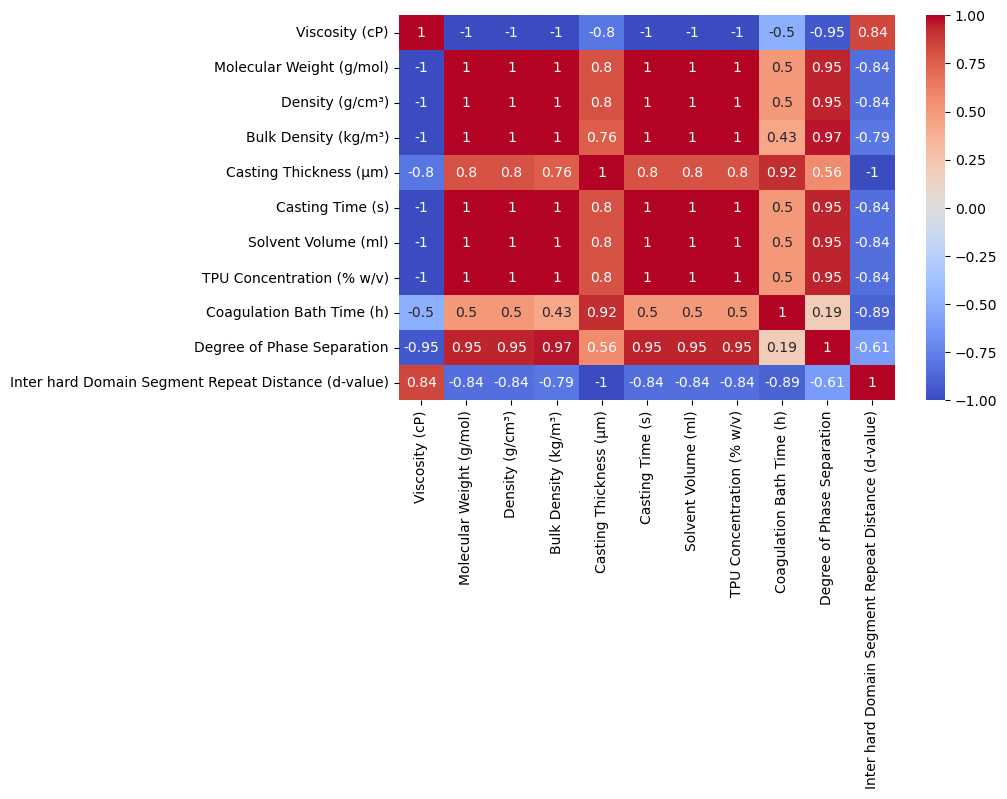

In [296]:
plt.figure(figsize=(8,5))  # Width, Height in inches

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()

In [297]:
# Viscosity vs. Density: The higher viscosity of PU Foam does not correlate with higher density because the foam structure 
#includes trapped gas bubbles, significantly reducing the overall density.

C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


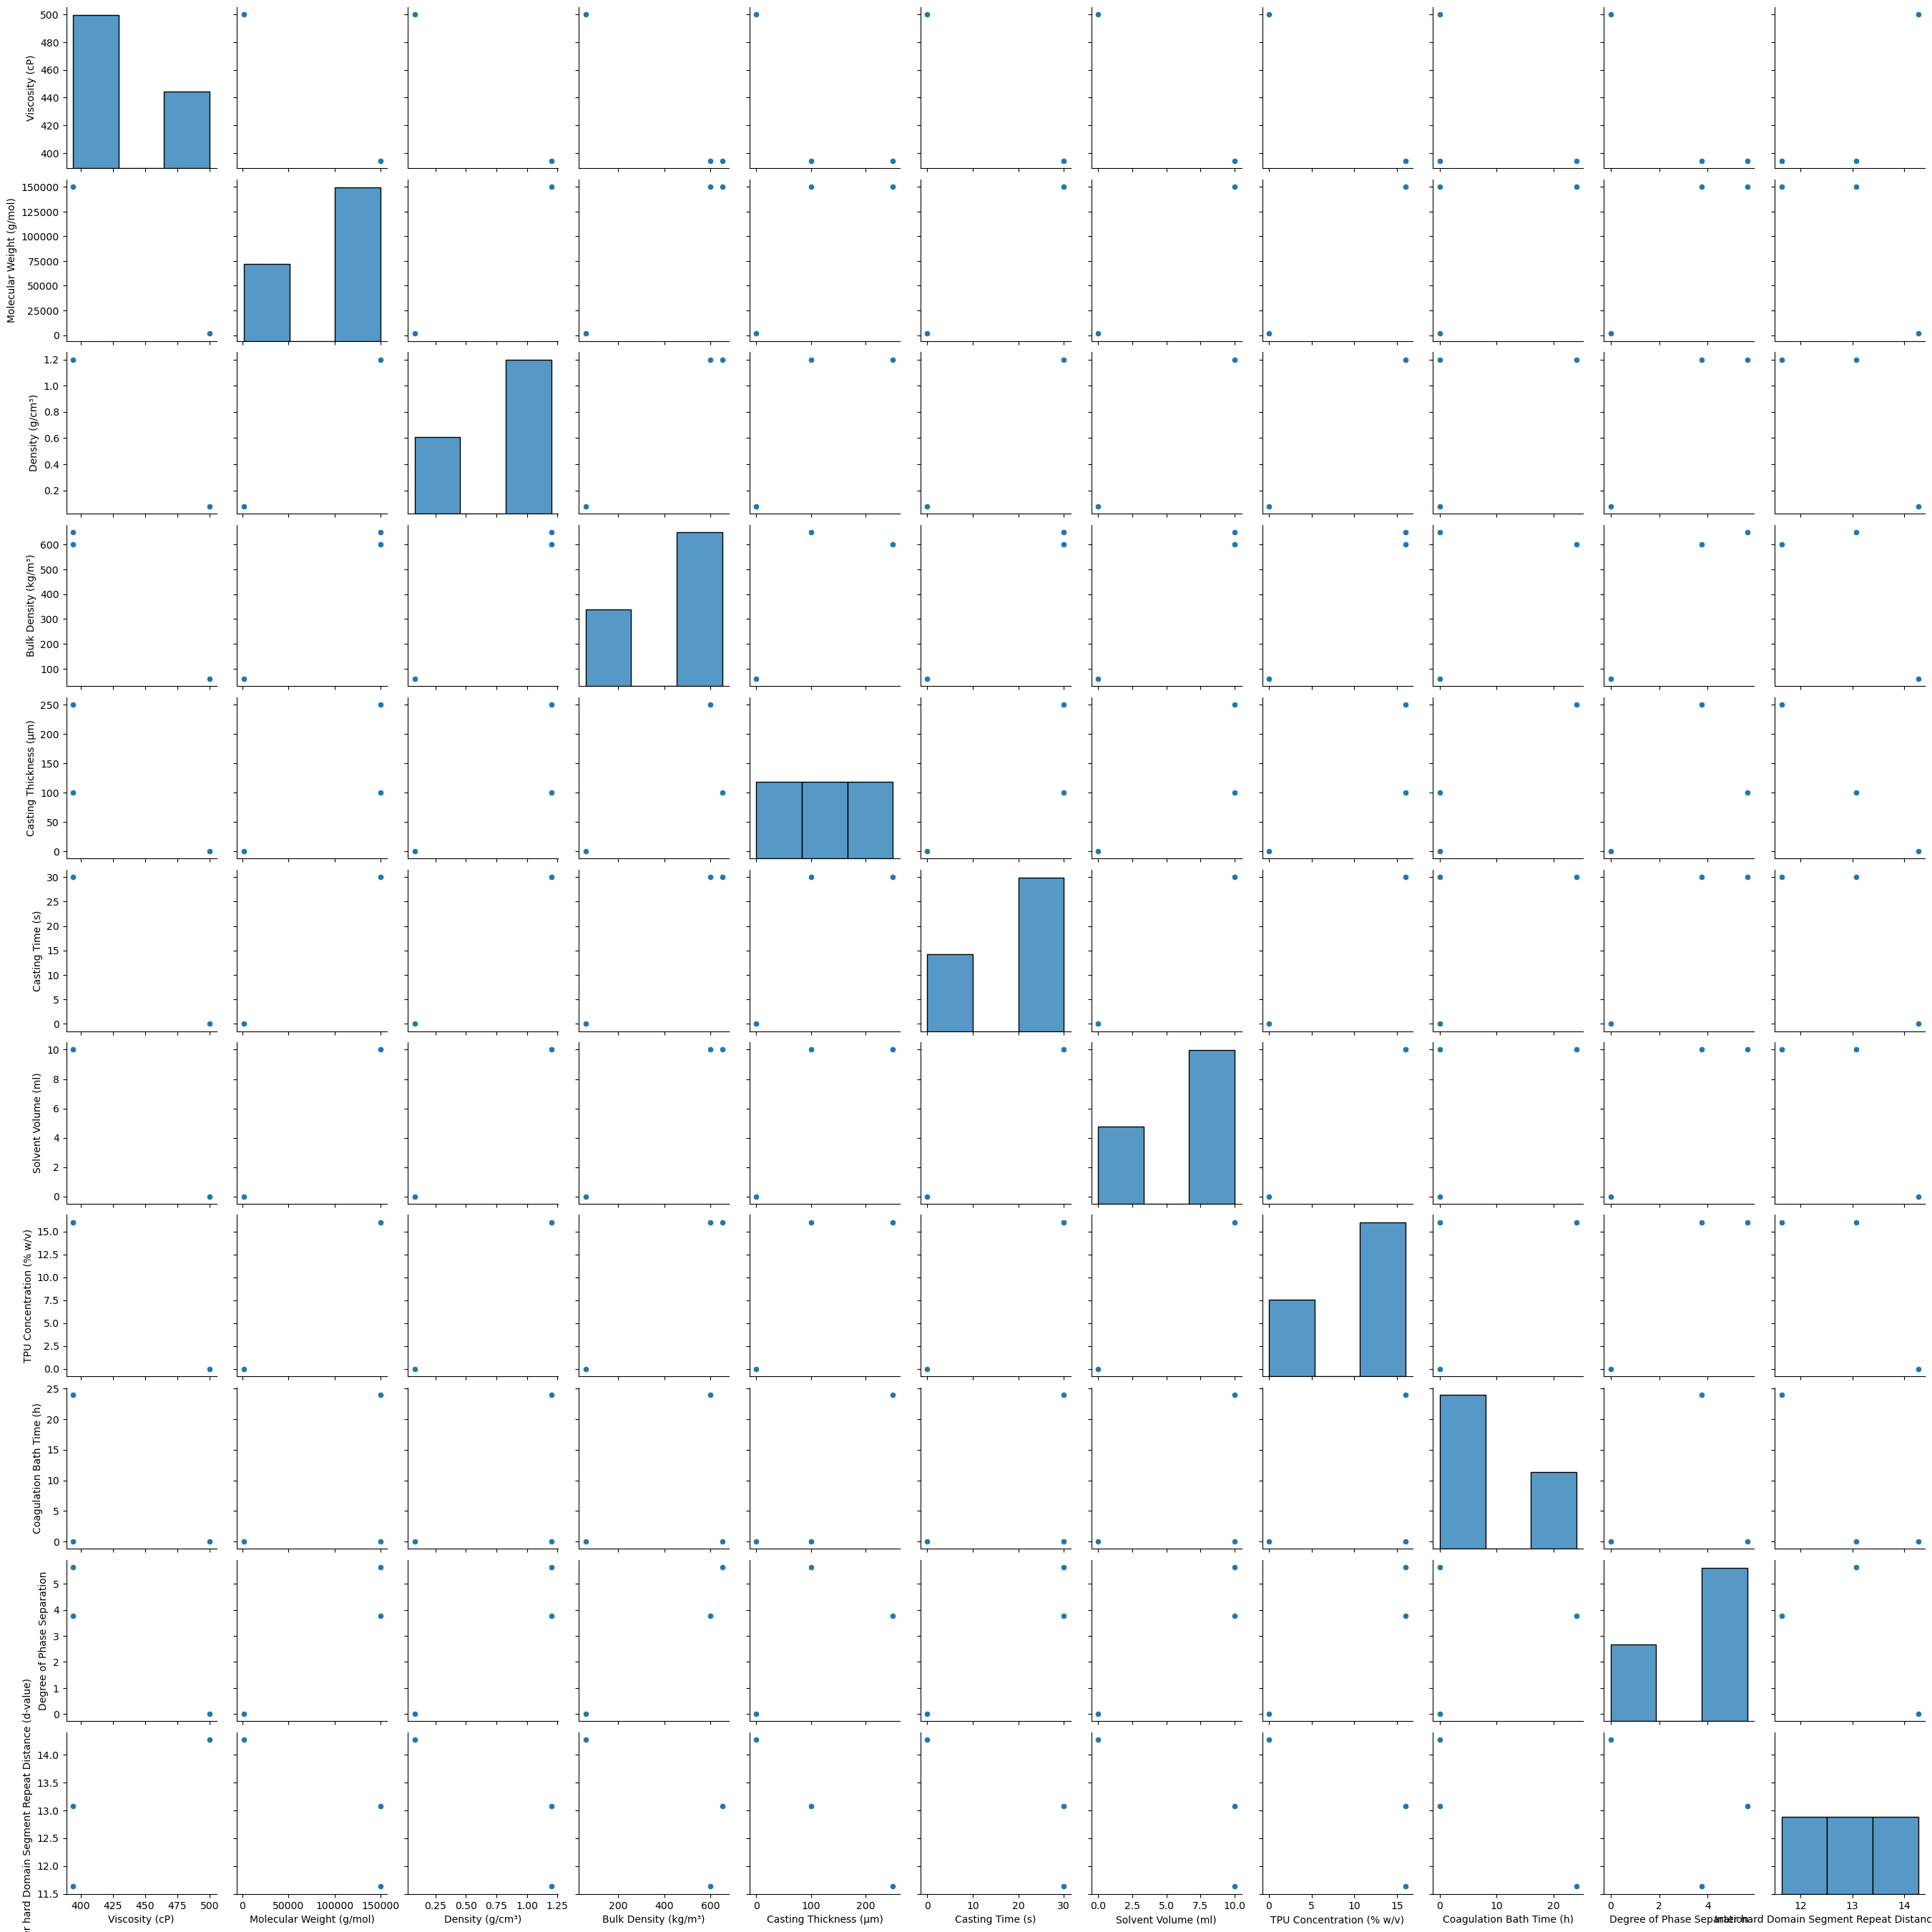

In [298]:
sns.pairplot(df)

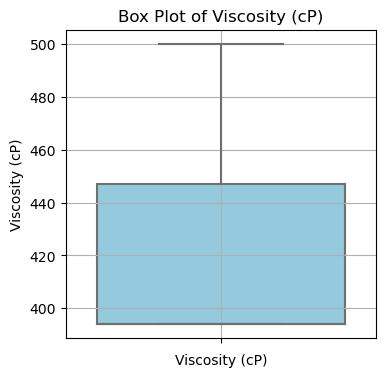

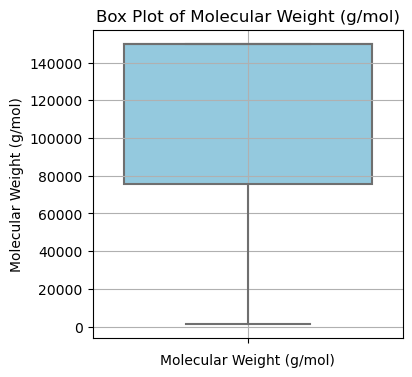

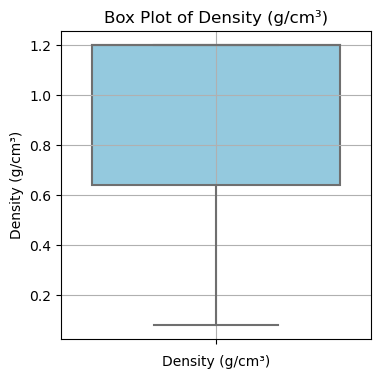

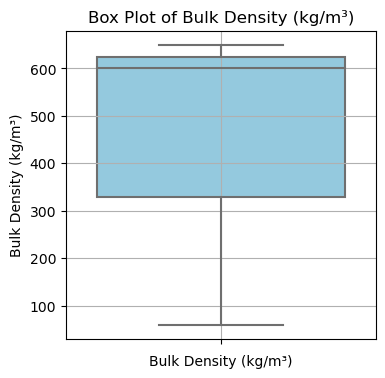

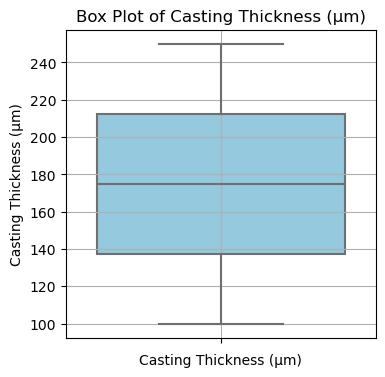

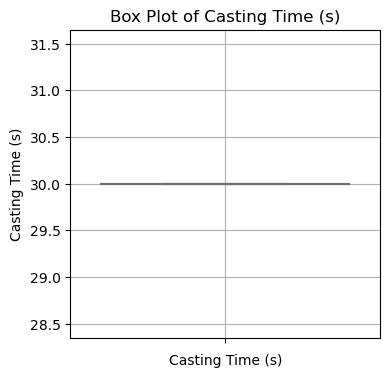

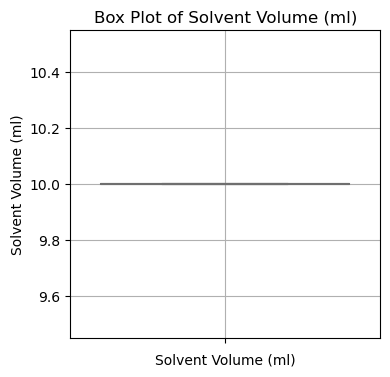

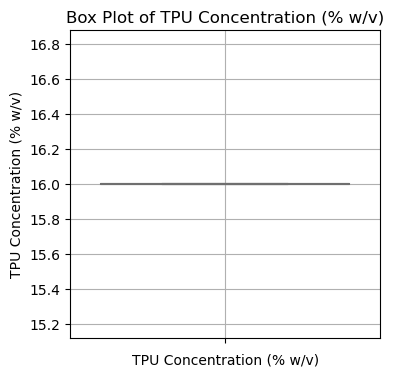

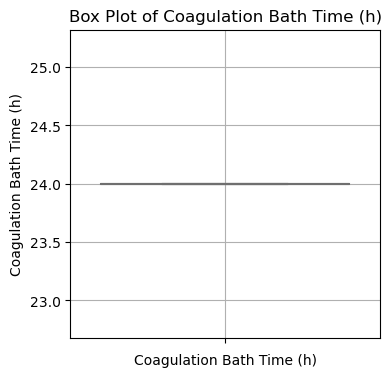

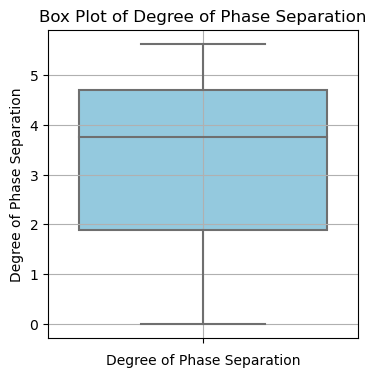

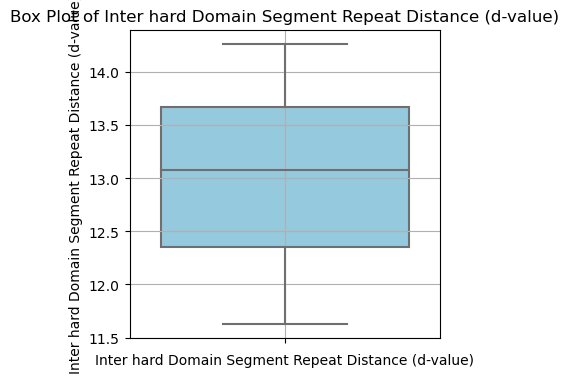

In [214]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    'Material': ['TPU Membrane', 'TPU Film', 'PU Foam'],
    'Viscosity (cP)': [394.2, 394.2, 500.0],
    'Molecular Weight (g/mol)': ['1,50,000', '1,50,000', '1500'],
    'Density (g/cm³)': [1.20, 1.20, 0.08],
    'Bulk Density (kg/m³)': [600, 650, 60],
    'Casting Thickness (µm)': [250, 100, None],
    'Casting Time (s)': [30, 30, None],
    'Solvent Type': ['DMF', 'DMF', None],
    'Solvent Volume (ml)': [10, 10, None],
    'TPU Concentration (% w/v)': [16, 16, None],
    'Coagulation Bath Time (h)': [24, None, None],
    'Drying Method': ['Coagulation (Water)', 'Solvent Evaporation', None],
    'Polyol/Isocyanate Ratio': ['100:60', '100:60', '100:60'],
    'Formation Method': ['Phase Inversion', 'Casting (Petridish)', 'Polyol-Isocyanate Mixing'],
    'Degree of Phase Separation': [3.760, 5.630, 0.003],
    'Inter hard Domain Segment Repeat Distance (d-value)': [11.63, 13.08, 14.27]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Molecular Weight' to numeric, removing commas
df['Molecular Weight (g/mol)'] = df['Molecular Weight (g/mol)'].str.replace(',', '').astype(float)

# Plotting box plots for numerical columns using a loop
numerical_columns = df.select_dtypes(include='number').columns

for column in numerical_columns:
    plt.figure(figsize=(4, 4))
    sns.boxplot(y=df[column], color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()


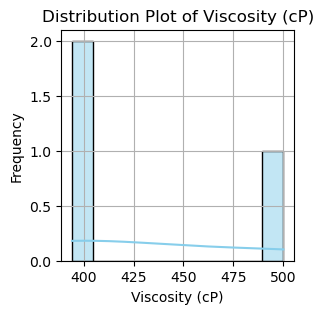

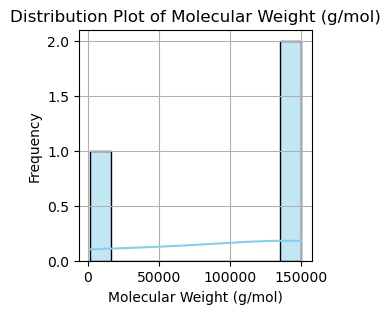

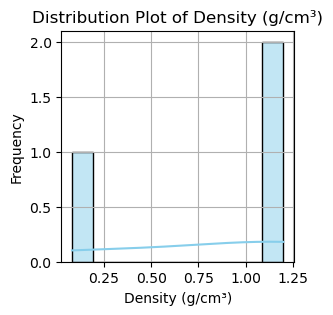

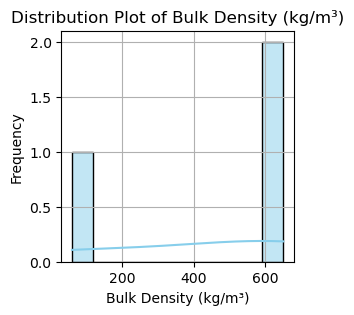

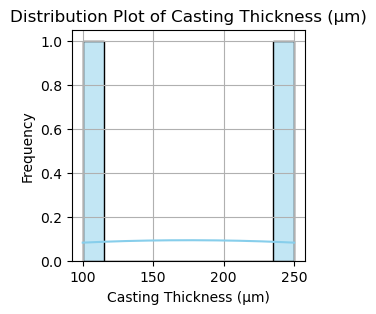

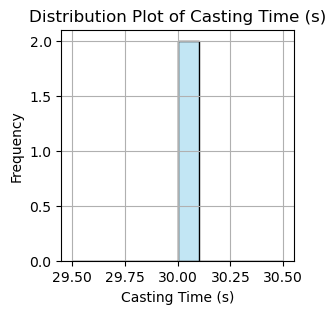

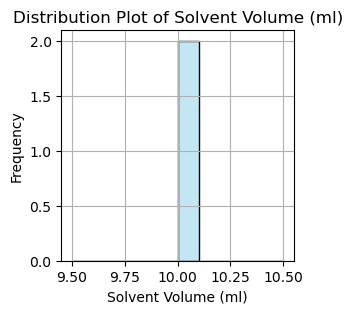

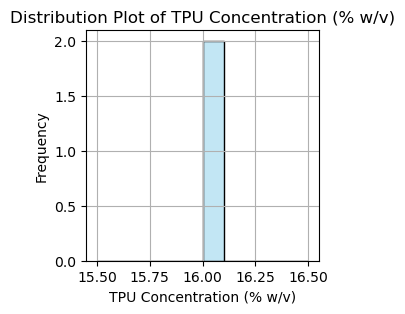

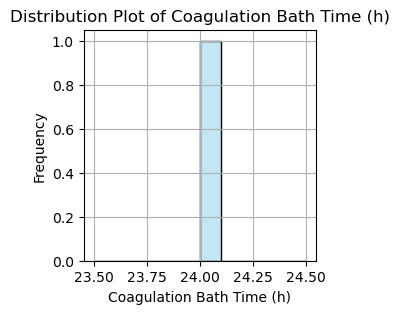

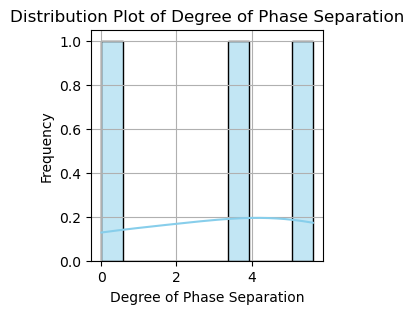

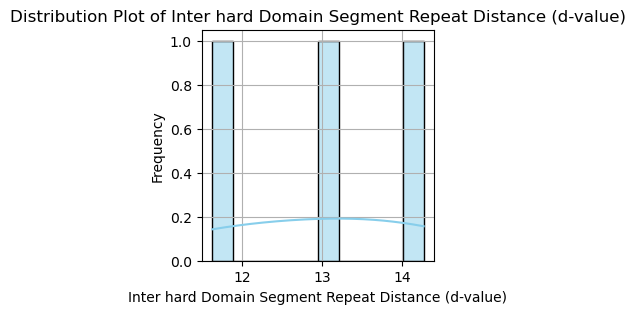

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    'Material': ['TPU Membrane', 'TPU Film', 'PU Foam'],
    'Viscosity (cP)': [394.2, 394.2, 500.0],
    'Molecular Weight (g/mol)': ['1,50,000', '1,50,000', '1500'],
    'Density (g/cm³)': [1.20, 1.20, 0.08],
    'Bulk Density (kg/m³)': [600, 650, 60],
    'Casting Thickness (µm)': [250, 100, None],
    'Casting Time (s)': [30, 30, None],
    'Solvent Type': ['DMF', 'DMF', None],
    'Solvent Volume (ml)': [10, 10, None],
    'TPU Concentration (% w/v)': [16, 16, None],
    'Coagulation Bath Time (h)': [24, None, None],
    'Drying Method': ['Coagulation (Water)', 'Solvent Evaporation', None],
    'Polyol/Isocyanate Ratio': ['100:60', '100:60', '100:60'],
    'Formation Method': ['Phase Inversion', 'Casting (Petridish)', 'Polyol-Isocyanate Mixing'],
    'Degree of Phase Separation': [3.760, 5.630, 0.003],
    'Inter hard Domain Segment Repeat Distance (d-value)': [11.63, 13.08, 14.27]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Molecular Weight' to numeric, removing commas
df['Molecular Weight (g/mol)'] = df['Molecular Weight (g/mol)'].str.replace(',', '').astype(float)

# Define numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Plotting distplots for numerical columns using a loop
for column in numerical_columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[column], kde=True, color='skyblue', bins=10)
    plt.title(f'Distribution Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


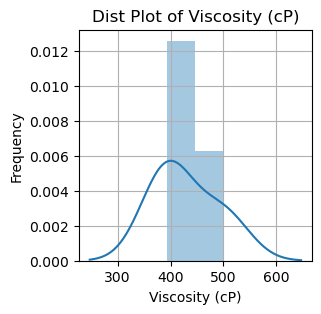

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


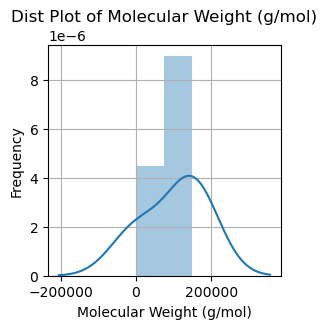

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


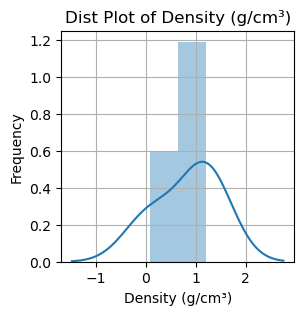

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


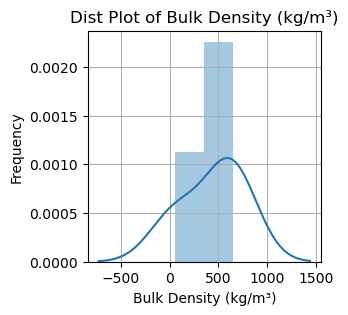

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


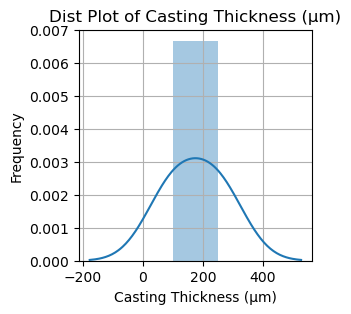

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


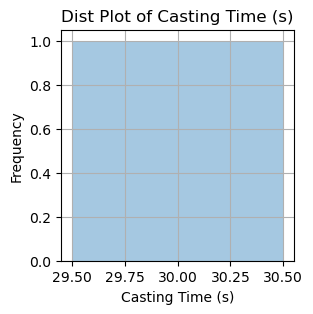

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


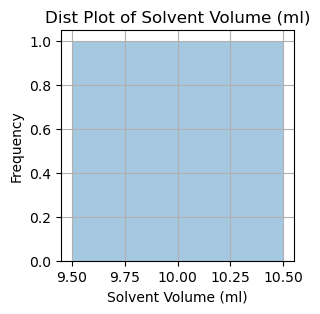

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


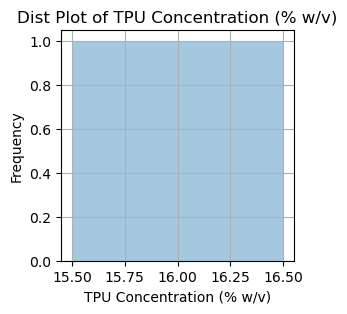

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\rahul\anaconda3\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


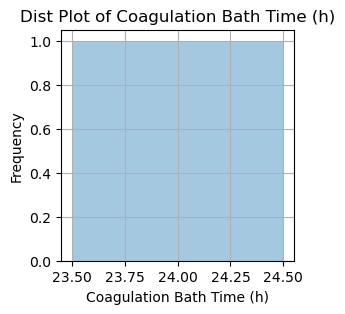

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


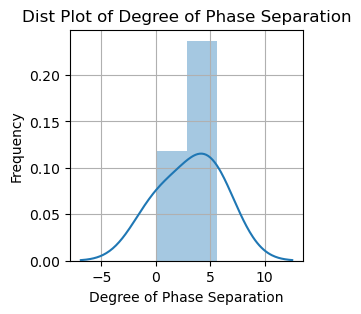

C:\Users\rahul\AppData\Local\Temp\ipykernel_10412\1463356753.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


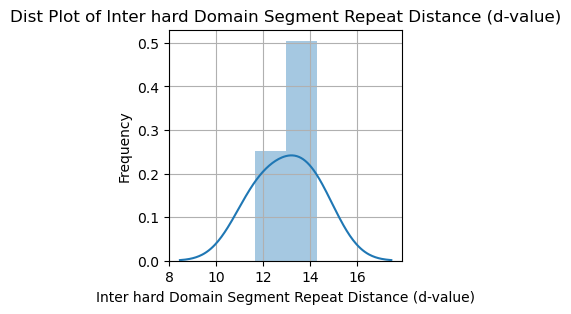

In [279]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data
data = {
    'Material': ['TPU Membrane', 'TPU Film', 'PU Foam'],
    'Viscosity (cP)': [394.2, 394.2, 500.0],
    'Molecular Weight (g/mol)': ['1,50,000', '1,50,000', '1500'],
    'Density (g/cm³)': [1.20, 1.20, 0.08],
    'Bulk Density (kg/m³)': [600, 650, 60],
    'Casting Thickness (µm)': [250, 100, None],
    'Casting Time (s)': [30, 30, None],
    'Solvent Type': ['DMF', 'DMF', None],
    'Solvent Volume (ml)': [10, 10, None],
    'TPU Concentration (% w/v)': [16, 16, None],
    'Coagulation Bath Time (h)': [24, None, None],
    'Drying Method': ['Coagulation (Water)', 'Solvent Evaporation', None],
    'Polyol/Isocyanate Ratio': ['100:60', '100:60', '100:60'],
    'Formation Method': ['Phase Inversion', 'Casting (Petridish)', 'Polyol-Isocyanate Mixing'],
    'Degree of Phase Separation': [3.760, 5.630, 0.003],
    'Inter hard Domain Segment Repeat Distance (d-value)': [11.63, 13.08, 14.27]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert 'Molecular Weight' to numeric, removing commas
df['Molecular Weight (g/mol)'] = df['Molecular Weight (g/mol)'].str.replace(',', '').astype(float)

# Define numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Plotting distplots for numerical columns using a loop
for column in numerical_columns:
    plt.figure(figsize=(3, 3))
    sns.distplot(df[column])
    plt.title(f'Dist Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [216]:
# Print the columns to see if there is any discrepancy
print(df.columns)

# Strip spaces from column names to avoid hidden characters
df.columns = df.columns.str.strip()

# Now try encoding again
label_encoder = LabelEncoder()

# If 'Formation Method' was the issue, this will ensure correct reference
df['Formation Method'] = label_encoder.fit_transform(df['Formation Method'])

# You can check the DataFrame again to ensure the issue is resolved
print(df.head())


Index(['Material', 'Viscosity (cP)', 'Molecular Weight (g/mol)',
       'Density (g/cm³)', 'Bulk Density (kg/m³)', 'Casting Thickness (µm)',
       'Casting Time (s)', 'Solvent Type', 'Solvent Volume (ml)',
       'TPU Concentration (% w/v)', 'Coagulation Bath Time (h)',
       'Drying Method', 'Polyol/Isocyanate Ratio', 'Formation Method',
       'Degree of Phase Separation',
       'Inter hard Domain Segment Repeat Distance (d-value)'],
      dtype='object')
       Material  Viscosity (cP)  Molecular Weight (g/mol)  Density (g/cm³)  \
0  TPU Membrane           394.2                  150000.0             1.20   
1      TPU Film           394.2                  150000.0             1.20   
2       PU Foam           500.0                    1500.0             0.08   

   Bulk Density (kg/m³)  Casting Thickness (µm)  Casting Time (s)  \
0                   600                   250.0              30.0   
1                   650                   100.0              30.0   
2              

In [219]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Drop features with zero variance (e.g. Polyol/Isocyanate Ratio)
df.drop(['Polyol/Isocyanate Ratio'], axis=1, inplace=True)

# Encode categorical features
label_encoder = LabelEncoder()
df['Solvent Type'] = label_encoder.fit_transform(df['Solvent Type'])
df['Drying Method'] = label_encoder.fit_transform(df['Drying Method'])
df['Formation Method'] = label_encoder.fit_transform(df['Formation Method'])
df['Material'] = label_encoder.fit_transform(df['Material'])


# Scale numerical features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

print(scaled_df)


   Material  Viscosity (cP)  Molecular Weight (g/mol)  Density (g/cm³)  \
0  1.224745       -0.707107                  0.707107         0.707107   
1  0.000000       -0.707107                  0.707107         0.707107   
2 -1.224745        1.414214                 -1.414214        -1.414214   

   Bulk Density (kg/m³)  Casting Thickness (µm)  Casting Time (s)  \
0              0.611450                     1.0               0.0   
1              0.798629                    -1.0               0.0   
2             -1.410079                     NaN               NaN   

   Solvent Type  Solvent Volume (ml)  TPU Concentration (% w/v)  \
0     -0.707107                  0.0                        0.0   
1     -0.707107                  0.0                        0.0   
2      1.414214                  NaN                        NaN   

   Coagulation Bath Time (h)  Drying Method  Formation Method  \
0                        0.0      -1.224745          0.000000   
1                        Na

In [220]:
scaled_df

,Material,Viscosity (cP),Molecular Weight (g/mol),Density (g/cm³),Bulk Density (kg/m³),Casting Thickness (µm),Casting Time (s),Solvent Type,Solvent Volume (ml),TPU Concentration (% w/v),Coagulation Bath Time (h),Drying Method,Formation Method,Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
0,1.224745,-0.707107,0.707107,0.707107,0.611450,1.0,0.0,-0.707107,0.0,0.0,0.0,-1.224745,0.000000,0.268818,-1.262911
1,0.000000,-0.707107,0.707107,0.707107,0.798629,-1.0,0.0,-0.707107,0.0,0.0,NaN,0.000000,-1.224745,1.068006,0.080283
2,-1.224745,1.414214,-1.414214,-1.414214,-1.410079,NaN,NaN,1.414214,NaN,NaN,NaN,1.224745,1.224745,-1.336824,1.182628


In [221]:
df

,Material,Viscosity (cP),Molecular Weight (g/mol),Density (g/cm³),Bulk Density (kg/m³),Casting Thickness (µm),Casting Time (s),Solvent Type,Solvent Volume (ml),TPU Concentration (% w/v),Coagulation Bath Time (h),Drying Method,Formation Method,Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
0,2,394.2,150000.0,1.20,600,250.0,30.0,0,10.0,16.0,24.0,0,1,3.760,11.63
1,1,394.2,150000.0,1.20,650,100.0,30.0,0,10.0,16.0,NaN,1,0,5.630,13.08
2,0,500.0,1500.0,0.08,60,NaN,NaN,1,NaN,NaN,NaN,2,2,0.003,14.27


In [222]:
# Check for missing values
print(df.isnull().sum())

# Option 1: Fill missing values (imputation)
df.fillna(method='ffill', inplace=True)  # Forward fill as an example



Material                                               0
Viscosity (cP)                                         0
Molecular Weight (g/mol)                               0
Density (g/cm³)                                        0
Bulk Density (kg/m³)                                   0
Casting Thickness (µm)                                 1
Casting Time (s)                                       1
Solvent Type                                           0
Solvent Volume (ml)                                    1
TPU Concentration (% w/v)                              1
Coagulation Bath Time (h)                              2
Drying Method                                          0
Formation Method                                       0
Degree of Phase Separation                             0
Inter hard Domain Segment Repeat Distance (d-value)    0
dtype: int64


In [223]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Material                                             3 non-null      float64
 1   Viscosity (cP)                                       3 non-null      float64
 2   Molecular Weight (g/mol)                             3 non-null      float64
 3   Density (g/cm³)                                      3 non-null      float64
 4   Bulk Density (kg/m³)                                 3 non-null      float64
 5   Casting Thickness (µm)                               2 non-null      float64
 6   Casting Time (s)                                     2 non-null      float64
 7   Solvent Type                                         3 non-null      float64
 8   Solvent Volume (ml)                                  2 non-null      float

In [224]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [225]:
df

,Material,Viscosity (cP),Molecular Weight (g/mol),Density (g/cm³),Bulk Density (kg/m³),Casting Thickness (µm),Casting Time (s),Solvent Type,Solvent Volume (ml),TPU Concentration (% w/v),Coagulation Bath Time (h),Drying Method,Formation Method,Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
0,2,394.2,150000.0,1.20,600,250.0,30.0,0,10.0,16.0,24.0,0,1,3.760,11.63
1,1,394.2,150000.0,1.20,650,100.0,30.0,0,10.0,16.0,24.0,1,0,5.630,13.08
2,0,500.0,1500.0,0.08,60,100.0,30.0,1,10.0,16.0,24.0,2,2,0.003,14.27


In [226]:
X= df.drop(columns=['Degree of Phase Separation','Inter hard Domain Segment Repeat Distance (d-value)'])

In [227]:
y = df[['Degree of Phase Separation','Inter hard Domain Segment Repeat Distance (d-value)']]

In [262]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [263]:
print(X_train.shape),
print(X_test.shape)

(2, 13)
(1, 13)


In [264]:
X

,Material,Viscosity (cP),Molecular Weight (g/mol),Density (g/cm³),Bulk Density (kg/m³),Casting Thickness (µm),Casting Time (s),Solvent Type,Solvent Volume (ml),TPU Concentration (% w/v),Coagulation Bath Time (h),Drying Method,Formation Method
0,2,394.2,150000.0,1.20,600,250.0,30.0,0,10.0,16.0,24.0,0,1
1,1,394.2,150000.0,1.20,650,100.0,30.0,0,10.0,16.0,24.0,1,0
2,0,500.0,1500.0,0.08,60,100.0,30.0,1,10.0,16.0,24.0,2,2


In [265]:
y

,Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
0,3.760,11.63
1,5.630,13.08
2,0.003,14.27


In [266]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale your feature matrix X

In [267]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=2, shuffle=True, random_state=0)
scores = cross_val_score(model, X, y, cv=kf)


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [268]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Use KFold for regression problems
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Print scores (if using MSE, you may want to take the negative)
print('Cross-validation scores (MSE):', scores)



Cross-validation scores (MSE): [ -1.6817291   -4.70778621 -13.02348293]


In [269]:
# Example with RandomForest for multi-output regression
from sklearn.ensemble import RandomForestRegressor

# Define your model
model = RandomForestRegressor()

# Perform cross-validation with multi-output regression
scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')


In [270]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [271]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=2)
print("Cross-validation scores:", scores)

Cross-validation scores: [-16.07951671          nan]


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [272]:
# Check data types
print(X.dtypes)

Material                       int64
Viscosity (cP)               float64
Molecular Weight (g/mol)     float64
Density (g/cm³)              float64
Bulk Density (kg/m³)           int64
Casting Thickness (µm)       float64
Casting Time (s)             float64
Solvent Type                   int64
Solvent Volume (ml)          float64
TPU Concentration (% w/v)    float64
Coagulation Bath Time (h)    float64
Drying Method                  int64
Formation Method               int64
dtype: object


In [273]:
# Fit the model directly on the data without cross-validation
model.fit(X_train, y_train)

# Get R² score on the test set
score = model.score(X_test, y_test)
print("R² score:", score)

R² score: nan


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [274]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Example for MAE
mae = mean_absolute_error(y_test, y_pred)
print('MAE:', mae)

# Example for MSE
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)


MAE: 1.171929999999994
MSE: 1.6648795417999849


In [275]:
from sklearn.model_selection import GridSearchCV

# Example for Lasso
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(Lasso(), param_grid=params, scoring='neg_mean_squared_error', cv=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
print(grid_search.best_params_)


{'alpha': 0.001}


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, toleranc

In [276]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Define the models with pipelines
models = {
    'lr': Pipeline([('scaler', StandardScaler()), ('model', LinearRegression())]),
    'ridge': Pipeline([('scaler', StandardScaler()), ('model', Ridge())]),
    'en': Pipeline([('scaler', StandardScaler()), ('model', ElasticNet(alpha=0.001, l1_ratio=0.9, random_state=42))]),
    'lasso': Pipeline([('scaler', StandardScaler()), ('model', Lasso())]),
    'rf': Pipeline([('scaler', StandardScaler()), ('model', RandomForestRegressor(random_state=2, n_estimators=20, max_depth=2, max_features=0.2, max_samples=0.5))]),
    'xgb_reg': Pipeline([('scaler', StandardScaler()), ('model', XGBRegressor())]),
    'dt': Pipeline([('scaler', StandardScaler()), ('model', DecisionTreeRegressor(random_state=42))]),
    
}

# Initialize variables to store the best model, its name, and its predictions
best_model_name = None
best_mae = float('inf')  # Start with the highest possible MAE
best_y_pred = None

# Fit the models and evaluate
for name, md in models.items():
    md.fit(X_train, y_train)
    y_pred = md.predict(X_test)
    current_mae = mean_absolute_error(y_test, y_pred)
    
    print(f"{name} : mae : {current_mae} score : {r2_score(y_test, y_pred)}")
    
    # Check if the current model has a lower MAE than the best one so far
    if current_mae < best_mae:
        best_mae = current_mae
        best_model_name = name
        best_y_pred = y_pred  # Store the predictions of the best model

print(f"\nBest model: {best_model_name} with MAE: {best_mae}")
print(f"Predictions from the best model: {best_y_pred}")


lr : mae : 2.0524676906779655 score : nan
ridge : mae : 1.9641313559322038 score : nan
en : mae : 3.877494043383134 score : nan
lasso : mae : 3.271 score : nan
rf : mae : 1.1534000000000004 score : nan
xgb_reg : mae : 1.6599573421478269 score : nan
dt : mae : 1.6599999999999997 score : nan

Best model: rf with MAE: 1.1534000000000004
Predictions from the best model: [[ 3.3792 13.556 ]]


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn

In [277]:
y_test

,Degree of Phase Separation,Inter hard Domain Segment Repeat Distance (d-value)
0,3.76,11.63


In [299]:
y_pred

[3.3792, 13.556]

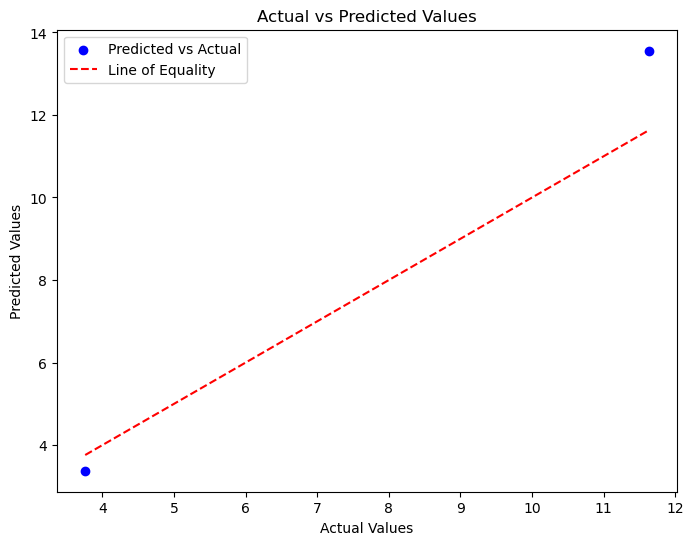

In [278]:
import matplotlib.pyplot as plt

# Example data
y_true = [3.76,11.63]  # Actual values
y_pred = [3.3792,13.556]  # Predicted values

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--', label='Line of Equality')

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Display the plot
plt.show()


# Result
# Random Forest Regressor give the best result with MAE of 1.534